In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import os 
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy.lib.recfunctions as rfn

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

2023/08/31 02:37:33 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].
2023/08/31 02:37:33 ---  Making Basic Simulation. ID: 2


30

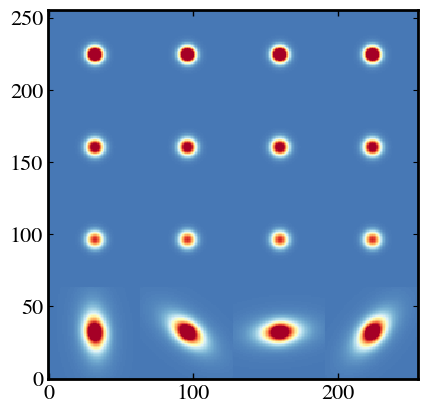

In [2]:
ngrid = 256
shear_value = 0.02
scale = 0.168
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psf_data = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=ngrid, ny=ngrid, scale=scale).array

seed = 2
gname = "g1-2222"
gal_data = fpfs.simutil.make_isolate_sim(
    gal_type="basic",
    psf_obj=psfInt,
    gname=gname,
    seed=seed,
    ny=ngrid,
    nx=ngrid,
    scale=scale,
    do_shift=False,
    nrot=4,
    shear_value=shear_value,
)
plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))

In [3]:
rcut = 16
psf_data = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=rcut*2, ny=rcut*2, scale=scale).array

p1 = ngrid //2 - rcut
p2 = ngrid //2 - rcut
psf_data2 = np.pad(psf_data, ((p1, p1), (p2, p2)))

fpTask  =   fpfs.image.measure_source(psf_data, sigma_arcsec=0.7)
coords = fpfs.image.detect_sources(
    gal_data,
    psf_data2,
    sigmaf=fpTask.sigmaf,
    sigmaf_det=fpTask.sigmaf_det,
    thres=0.01,
    thres2=-0.00,
)
print(coords.shape)


mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print(shear)

2023/08/31 02:37:34 ---  Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/08/31 02:37:34 ---  Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/08/31 02:37:34 ---  Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023/08/31 02:37:34 ---  Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023/08/31 02:37:34 ---  No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
2023/08/31 02:37:35 ---  Order of the shear estimator: nnord=4
2023/08/31 02:37:35 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/08/31 02:37:35 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


(16, 2)
0.01999581389806102
